## Part 1B EDA Exercise

In [258]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cd = os.getcwd()
print(cd)

C:\Users\dineshmi\Dropbox\Upgrad_DataScience\Course\EDA\EDA_Exercise


### 1st exercise to plot GDP Per capita for states in descending order

In [519]:
#Read All CSVs and append the names in a list

states = []
df = pd.DataFrame([])
df_temp = []
states_gdp = []

states_gdp = pd.read_csv("NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv")
states_gdp.drop(["S.No.","2011-12","2012-13","2013-14","2014-15","2015-16","2016-17"],axis=1,inplace=True)
states_gdp.reset_index()


for root, dir, files in os.walk('.'):
    for file in files:
        if(file.endswith('.csv') and file.startswith('NAD') ):
            #print(file)
            file_name_split = file.split("-")
            state = file_name_split[1]
            states.append(state)
            if(state != "Manipur"):
                df_temp = pd.read_csv(file)
            else:
                df_temp = pd.read_csv(file, encoding='latin-1')
                
            df_temp.rename(columns={"2014-15":state},inplace=True)
            states_gdp = pd.concat([states_gdp,df_temp[state]], axis=1)

#drop union territories column
union_territores = ["Delhi","Puducherry"]
states_gdp = states_gdp.drop(union_territores,axis=1,inplace=False, errors='ignore')

states_gdp.head()       

,Item,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttarakhand,Uttar_Pradesh,Andhra_Pradesh
0,"Agriculture, forestry and fishing",14819416,686117,3855548,7951890,16233,3948847,308507,13769969.0,8015238.0,...,6422978,9285716,15044394,137447,13064238,7591501,799825.0,1601423.0,25097754,14819416
1,Crops,7893514,415520,2890544,4688237,1659,2613371,140421,9671086.0,4636731.0,...,4382636,5690972,7673441,114976,7297820,4162493,397591.0,866146.0,16215212,7893514
2,Livestock,4309078,38387,173478,2060296,13992,352208,30141,2698910.0,2916173.0,...,788243,2638842,5356257,17338,4693361,2951299,88176.0,391188.0,7096876,4309078
3,Forestry and logging,346160,224017,261987,550132,388,597785,15744,761616.0,352254.0,...,791463,848245,1956660,4529,392705,210741,145096.0,339293.0,1404936,346160
4,Fishing and aquaculture,2270664,8193,529539,653224,194,385483,122201,638357.0,110080.0,...,460636,107657,58036,604,680352,266968,168961.0,4796.0,380730,2270664


In [520]:

#Set Header as Item
states_gdp = states_gdp.T
states_gdp.columns = states_gdp.iloc[0]
states_gdp = states_gdp.drop(states_gdp.index[0])

#states_gdp.reset_index(inplace=True)
#states_gdp.rename(columns={"index":"State"}, inplace=True)

states_gdp.sort_values("Per Capita GSDP (Rs.)", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 


states_gdp.head()

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
Goa,308507,140421,30141,15744,122201,3622,312129,1177608,204110,165819,...,407099,346486,180431,1738217,3597882,527279,61854,4063307,14950,271793
Chandigarh,16233,1659,13992,388,194,179,16412,149631,29741,133321,...,598448,183889,156543,2426008,2755113,52622,23309,2784426,11120,250398
Sikkim,137447,114976,17338,4529,604,1329,138776,550697,212499,82058,...,75330,119514,149265,483103,1467133,72200,18400,1520933,6330,240274
Haryana,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,...,6.97018e+06,1.03638e+06,2.00158e+06,1.92266e+07,3.98284e+07,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077
Kerala,5930617,3070386,1656104,499808,704319,558824,6489442,4273567,482470,7314003,...,7287633,2068915,5728645,29673778,48233259,5189352,822381,52600230,339843,154778


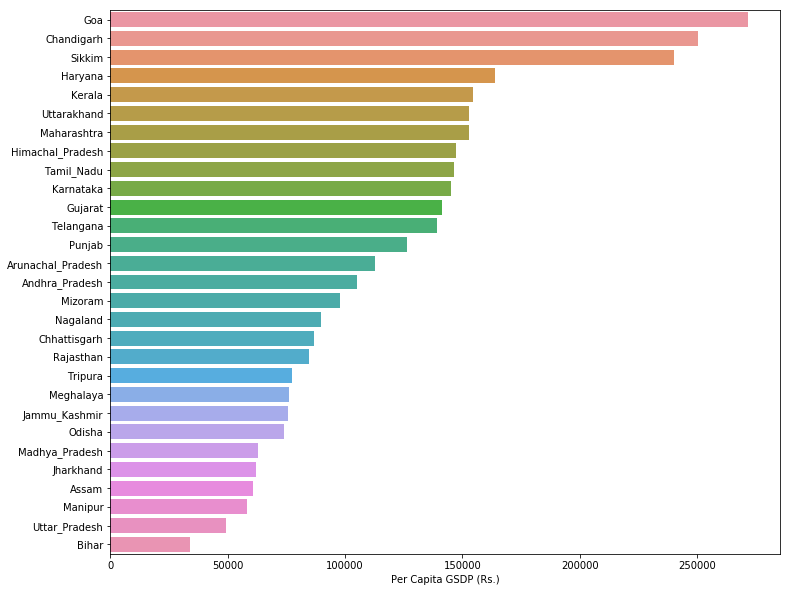

In [521]:
#Plot the states GDP per capita
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize =(12,10))
#sns.barplot(x="Per Capita GSDP (Rs.)",y="State",data=states_gdp)
sns.barplot(x="Per Capita GSDP (Rs.)",y=states_gdp.index,data=states_gdp)

plt.show()


### Plot the percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP for all the states

In [522]:
states_gdp["%Primary"] = (states_gdp["Primary"]*100)/(states_gdp["Primary"] + states_gdp["Secondary"] + states_gdp["Tertiary"])
states_gdp["%Secondary"] = (states_gdp["Secondary"]*100)/(states_gdp["Primary"] + states_gdp["Secondary"] + states_gdp["Tertiary"])
states_gdp["%Tertiary"] = (states_gdp["Tertiary"]*100)/(states_gdp["Primary"] + states_gdp["Secondary"] + states_gdp["Tertiary"])
states_gdp.head()

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),%Primary,%Secondary,%Tertiary
Goa,308507,140421,30141,15744,122201,3622,312129,1177608,204110,165819,...,1738217,3597882,527279,61854,4063307,14950,271793,8.67535,43.0124,48.3122
Chandigarh,16233,1659,13992,388,194,179,16412,149631,29741,133321,...,2426008,2755113,52622,23309,2784426,11120,250398,0.595692,11.3496,88.0548
Sikkim,137447,114976,17338,4529,604,1329,138776,550697,212499,82058,...,483103,1467133,72200,18400,1520933,6330,240274,9.459,57.6126,32.9284
Haryana,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,...,1.92266e+07,3.98284e+07,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,20.1877,31.5388,48.2735
Kerala,5930617,3070386,1656104,499808,704319,558824,6489442,4273567,482470,7314003,...,29673778,48233259,5189352,822381,52600230,339843,154778,13.4543,25.0243,61.5214


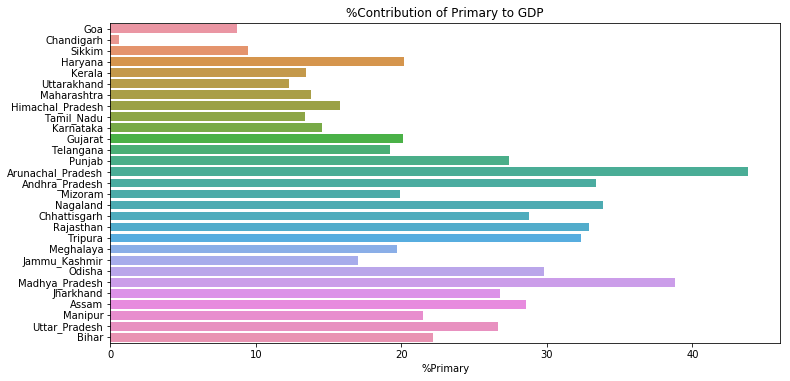

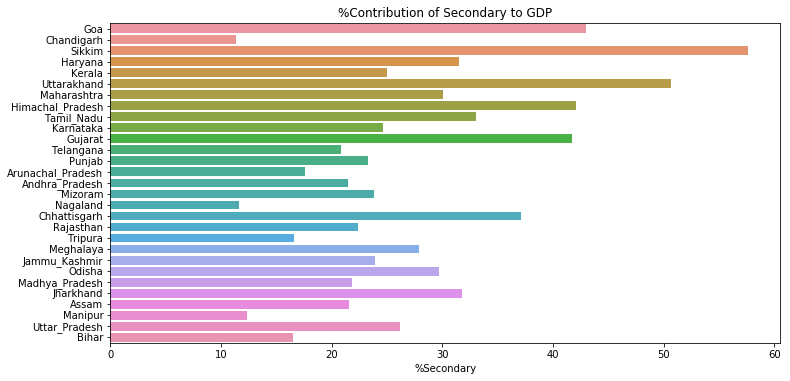

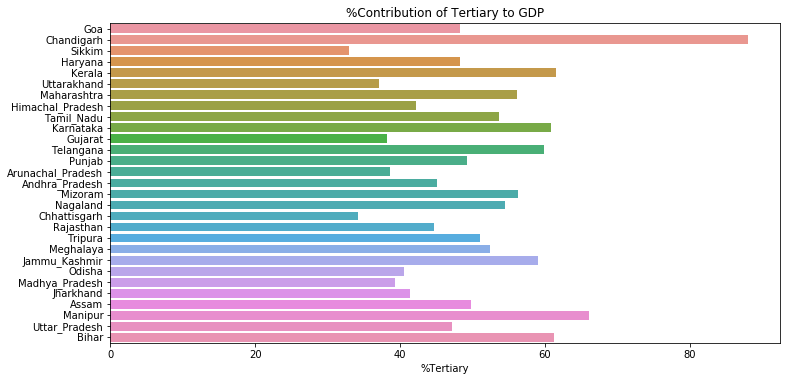

In [523]:
#SHow the Trends using 3 different plots
plt.figure(figsize =(12,20))

plt.subplot(3,1,1)
plt.title('%Contribution of Primary to GDP')
sns.barplot(x="%Primary",y=states_gdp.index,data=states_gdp)
plt.show()

plt.figure(figsize =(12,20))

plt.subplot(3,1,2)
plt.title('%Contribution of Secondary to GDP')
sns.barplot(x="%Secondary",y=states_gdp.index,data=states_gdp)
plt.show()

plt.figure(figsize =(12,20))

plt.subplot(3,1,1)
plt.title('%Contribution of Tertiary to GDP')
sns.barplot(x="%Tertiary",y=states_gdp.index,data=states_gdp)
plt.show()

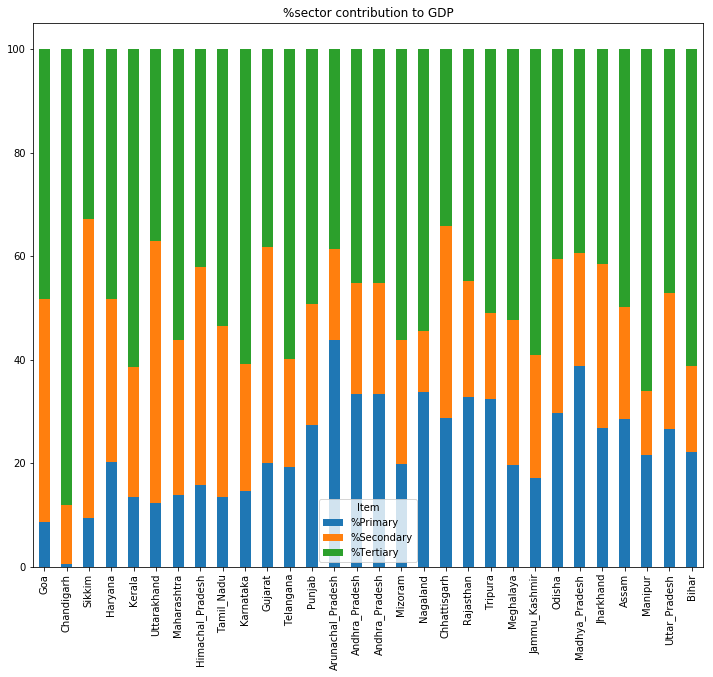

In [554]:
#Show using stacked barchart
states_gdp[["%Primary","%Secondary","%Tertiary"]].plot(kind='bar', stacked=True,figsize=(12,10),title="%sector contribution to GDP")
plt.show()


### Part 3

* Categorise the states into four categories based on GDP per capita (C1, C2, C3, C4 - C1 would have the highest per capita GDP, C4 the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e. the states lying between the 85th and the 100th percentile are in C1, those between 50th and 85th percentile are in C2 and so on

In [525]:
# Create a new column based for categories C1, C2, C3, C4 Calculated based on Quantile values of Per Capita GSDP
states_gdp['GDP Category'] = pd.qcut(states_gdp['Per Capita GSDP (Rs.)'], [0,0.20,0.5, 0.85, 1], labels=['C4','C3','C2','C1'])

states_gdp


Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),%Primary,%Secondary,%Tertiary,GDP Category
Goa,308507,140421,30141,15744,122201,3622,312129,1177608,204110,165819,...,3597882,527279,61854,4063307,14950,271793,8.67535,43.0124,48.3122,C1
Chandigarh,16233,1659,13992,388,194,179,16412,149631,29741,133321,...,2755113,52622,23309,2784426,11120,250398,0.595692,11.3496,88.0548,C1
Sikkim,137447,114976,17338,4529,604,1329,138776,550697,212499,82058,...,1467133,72200,18400,1520933,6330,240274,9.459,57.6126,32.9284,C1
Haryana,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,...,3.98284e+07,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,20.1877,31.5388,48.2735,C1
Kerala,5930617,3070386,1656104,499808,704319,558824,6489442,4273567,482470,7314003,...,48233259,5189352,822381,52600230,339843,154778,13.4543,25.0243,61.5214,C1
Uttarakhand,1.60142e+06,866146,391188,339293,4796,244549,1.84597e+06,5.86625e+06,433880,1.34273e+06,...,1.50768e+07,1.43486e+06,313139,1.61985e+07,105820,153076,12.2438,50.6928,37.0634,C2
Maharashtra,16475655,10435121,3972829,1592564,475141,5282727,21758383,33660294,4334702,9450211,...,157834665,25394800,4017300,179212165,1172450,152853,13.7856,30.0601,56.1544,C2
Himachal_Pradesh,1514981,853758,110304,540950,9968,33385,1548366,2543637,767268,808256,...,9800853,895317,259291,10436879,70840,147330,15.7983,42.0286,42.1731,C2
Tamil_Nadu,13064238,7297820,4693361,392705,680352,265536,13329774,18914794,1710379,12216718,...,99515453,12507325,2766405,109256373,745760,146503,13.3947,33.0018,53.6035,C2
Karnataka,11219422,8157179,1868771,693082,500390,846882,12066304,12953843,1425762,6104799,...,83041338,11026674,1889206,92178806,635100,145141,14.5305,24.6677,60.8018,C2


# Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc.) [not primary, secondary and tertiary] which contribute to approx. 80% of the GSDP of each category

In [526]:
#extract C1,C2,C3,C4 states in different dataframes
c1_states = states_gdp[states_gdp["GDP Category"] == "C1"]
c2_states = states_gdp[states_gdp["GDP Category"] == "C2"]
c3_states = states_gdp[states_gdp["GDP Category"] == "C3"]
c4_states = states_gdp[states_gdp["GDP Category"] == "C4"]

c1_states


Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),%Primary,%Secondary,%Tertiary,GDP Category
Goa,308507,140421,30141,15744,122201,3622,312129,1177608,204110,165819,...,3597882,527279,61854,4063307,14950,271793,8.67535,43.0124,48.3122,C1
Chandigarh,16233,1659,13992,388,194,179,16412,149631,29741,133321,...,2755113,52622,23309,2784426,11120,250398,0.595692,11.3496,88.0548,C1
Sikkim,137447,114976,17338,4529,604,1329,138776,550697,212499,82058,...,1467133,72200,18400,1520933,6330,240274,9.459,57.6126,32.9284,C1
Haryana,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,...,3.98284e+07,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,20.1877,31.5388,48.2735,C1
Kerala,5930617,3070386,1656104,499808,704319,558824,6489442,4273567,482470,7314003,...,48233259,5189352,822381,52600230,339843,154778,13.4543,25.0243,61.5214,C1


In [527]:
# for each category,drop unnecessary columns and transpose
c1_states = c1_states.reset_index()
c2_states = c2_states.reset_index()
c3_states = c3_states.reset_index()
c4_states = c4_states.reset_index()


c1_states = c1_states.drop(["index","Primary","Secondary",'Tertiary',
       'TOTAL GSVA at basic prices', 'Taxes on Products',
       'Subsidies on products', 'Gross State Domestic Product',
       "Population ('00)", 'Per Capita GSDP (Rs.)', '%Primary', '%Secondary',
       '%Tertiary', 'GDP Category'],axis=1).T

c2_states = c2_states.drop(["index","Primary","Secondary",'Tertiary',
       'TOTAL GSVA at basic prices', 'Taxes on Products',
       'Subsidies on products', 'Gross State Domestic Product',
       "Population ('00)", 'Per Capita GSDP (Rs.)', '%Primary', '%Secondary',
       '%Tertiary', 'GDP Category'],axis=1).T

c3_states = c3_states.drop(["index","Primary","Secondary",'Tertiary',
       'TOTAL GSVA at basic prices', 'Taxes on Products',
       'Subsidies on products', 'Gross State Domestic Product',
       "Population ('00)", 'Per Capita GSDP (Rs.)', '%Primary', '%Secondary',
       '%Tertiary', 'GDP Category'],axis=1).T

c4_states = c4_states.drop(["index","Primary","Secondary",'Tertiary',
       'TOTAL GSVA at basic prices', 'Taxes on Products',
       'Subsidies on products', 'Gross State Domestic Product',
       "Population ('00)", 'Per Capita GSDP (Rs.)', '%Primary', '%Secondary',
       '%Tertiary', 'GDP Category'],axis=1).T

c4_states

,0,1,2,3,4,5
Item,,,,,,
"Agriculture, forestry and fishing",16235647,3211065,3855548,383140,25097754,7951890
Crops,13216013,2094466,2890544,226583,16215212,4688237
Livestock,1932769,562503,173478,75483,7096876,2060296
Forestry and logging,965588,445149,261987,45831,1404936,550132
Fishing and aquaculture,121277,108947,529539,35243,380730,653224
Mining and quarrying,1618373,2037289,1471149,NaN,901501,68107
Manufacturing,4368833,4114148,2002936,49501,12261649,2189965
"Electricity, gas, water supply & other utility services",1272905,337489,296587,27490,2030625,345168
Construction,4403151,1789834,1733568,143182,11256450,3449763


In [528]:
# add the rows for each column
c1_states["total"] = c1_states.sum(axis=1)
c2_states["total"] = c2_states.sum(axis=1)
c3_states["total"] = c3_states.sum(axis=1)
c4_states["total"] = c4_states.sum(axis=1)

#calculate %share
c1_states["%share"] = (c1_states["total"]*100)/c1_states["total"].sum(axis=0)
c2_states["%share"] = (c2_states["total"]*100)/c2_states["total"].sum(axis=0)
c3_states["%share"] = (c3_states["total"]*100)/c3_states["total"].sum(axis=0)
c4_states["%share"] = (c4_states["total"]*100)/c4_states["total"].sum(axis=0)


# sort according to % share
c1_states = c1_states.sort_values("%share",ascending=False)
c2_states = c2_states.sort_values("%share",ascending=False)
c3_states = c3_states.sort_values("%share",ascending=False)
c4_states = c4_states.sort_values("%share",ascending=False)

c1_states

,0,1,2,3,4,total,%share
Item,,,,,,,
"Real estate, ownership of dwelling & professional services",407099,598448,75330,6.97018e+06,7287633,15338693.0,11.601095
"Trade, repair, hotels and restaurants",380927,965781,70568,4.98632e+06,8557345,14960940.0,11.315389
"Agriculture, forestry and fishing",308507,16233,137447,8.01524e+06,5930617,14408042.0,10.897217
Manufacturing,1177608,149631,550697,7.75692e+06,4273567,13908424.0,10.519341
Trade & repair services,343492,890921,64624,4.81778e+06,7763847,13880668.0,10.498348
Construction,165819,133321,82058,3.70257e+06,7314003,11397772.0,8.620463
Other services,180431,156543,149265,2.00158e+06,5728645,8216465.0,6.214349
Crops,140421,1659,114976,4.63673e+06,3070386,7964173.0,6.023533
"Transport, storage, communication & services related to broadcasting",189656,148302,47347,2.56062e+06,4020934,6966862.0,5.269238


In [529]:
#find top sub-sectors contributing to 80% of GDP
from functools import reduce
import itertools

c1_states["%cumShare"] = list(itertools.accumulate(c1_states["%share"],lambda x,y:x+y))
c2_states["%cumShare"] = list(itertools.accumulate(c2_states["%share"],lambda x,y:x+y))
c3_states["%cumShare"] = list(itertools.accumulate(c3_states["%share"],lambda x,y:x+y))
c4_states["%cumShare"] = list(itertools.accumulate(c4_states["%share"],lambda x,y:x+y))


#print top sectors
c1_states.loc[c1_states[c1_states['%cumShare'] <= 80 ].index,'%share']




Item
Real estate, ownership of dwelling & professional services    11.601095
Trade, repair, hotels and restaurants                         11.315389
Agriculture, forestry and fishing                             10.897217
Manufacturing                                                 10.519341
Trade & repair services                                       10.498348
Construction                                                   8.620463
Other services                                                 6.214349
Crops                                                          6.023533
Name: %share, dtype: float64

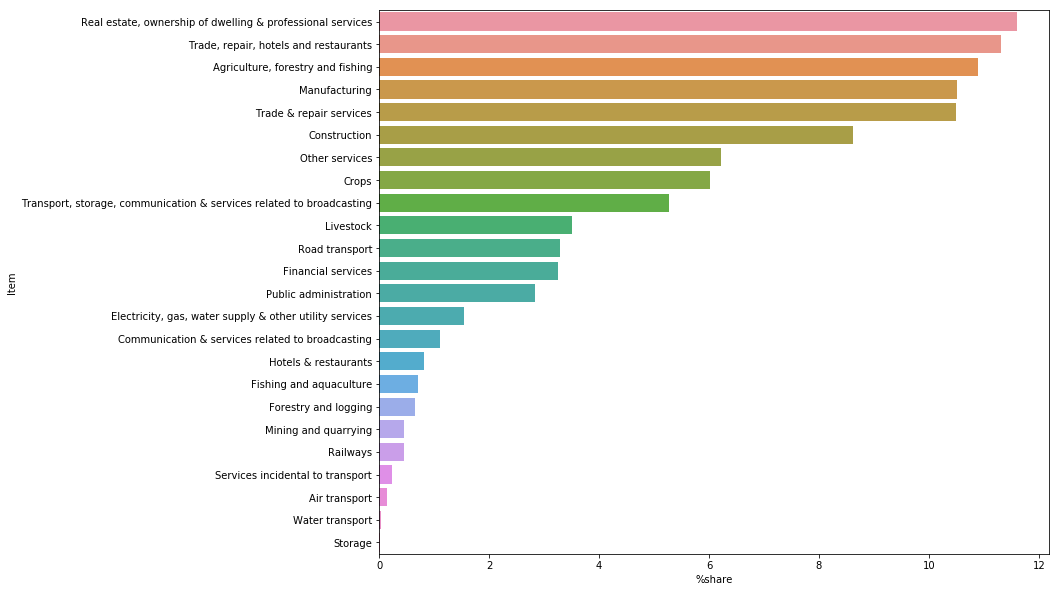

In [530]:
plt.figure(figsize=(12,10))
sns.barplot(x="%share",y = c1_states.index,data = c1_states)
plt.show()

In [531]:
c2_states.loc[c2_states[c2_states['%cumShare'] <= 80 ].index,'%share']

Item
Manufacturing                                                 15.651338
Real estate, ownership of dwelling & professional services    13.203935
Agriculture, forestry and fishing                             10.779846
Trade, repair, hotels and restaurants                          8.777478
Trade & repair services                                        7.919418
Crops                                                          6.815442
Construction                                                   5.826949
Financial services                                             5.202464
Other services                                                 5.196303
Name: %share, dtype: float64

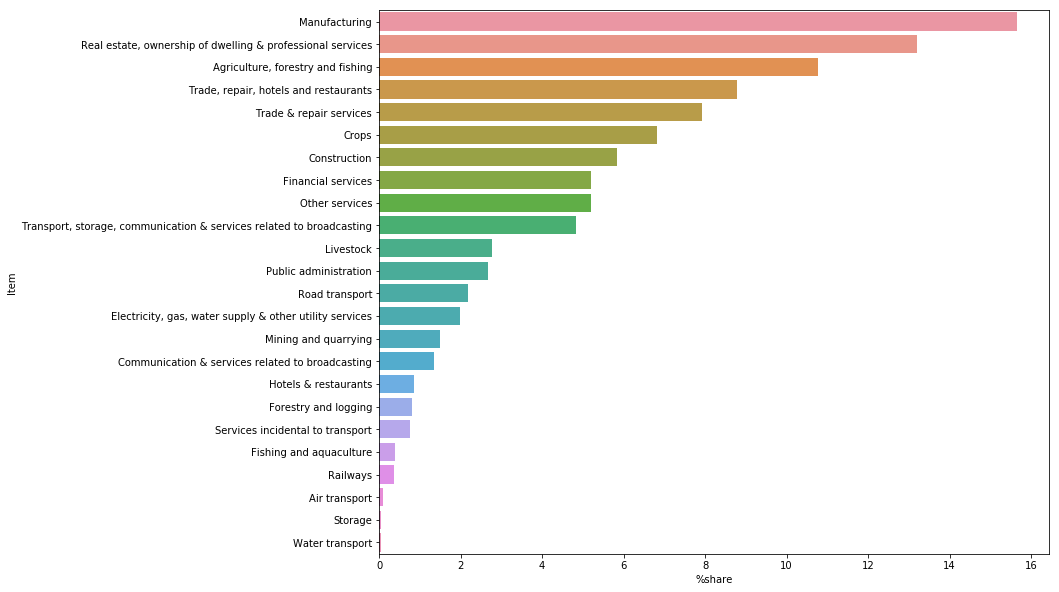

In [532]:
plt.figure(figsize=(12,10))
sns.barplot(x="%share",y = c2_states.index,data = c2_states)
plt.show()

In [533]:
c3_states.loc[c3_states[c3_states['%cumShare'] <= 80 ].index,'%share']


Item
Agriculture, forestry and fishing                                       18.041961
Crops                                                                   10.006499
Manufacturing                                                            8.493965
Trade, repair, hotels and restaurants                                    6.883053
Real estate, ownership of dwelling & professional services               6.760267
Construction                                                             6.510624
Trade & repair services                                                  6.300946
Transport, storage, communication & services related to broadcasting     5.545247
Other services                                                           5.531896
Livestock                                                                4.885820
Name: %share, dtype: float64

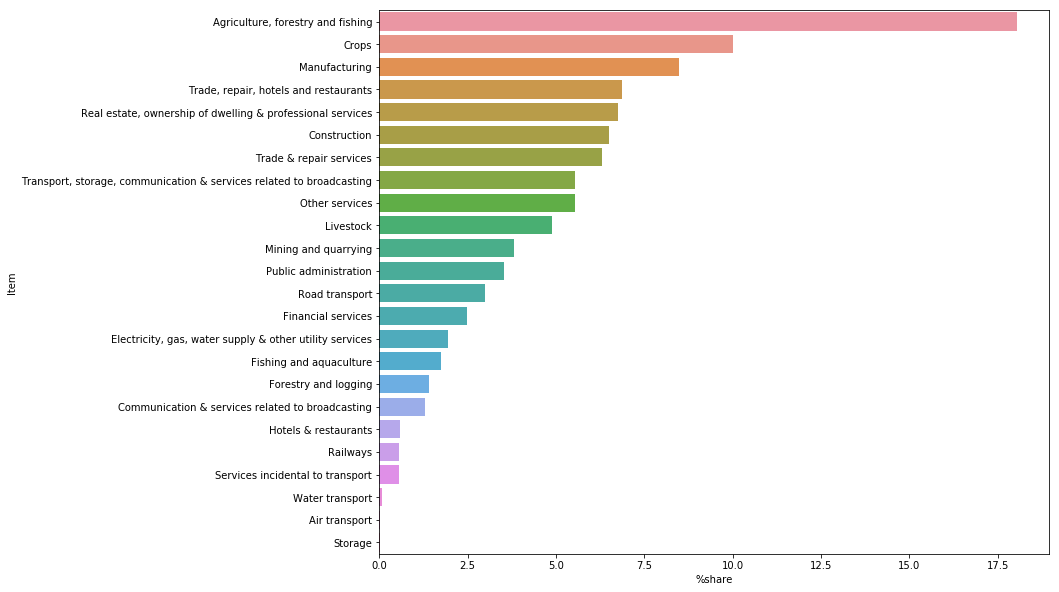

In [534]:
plt.figure(figsize=(12,10))
sns.barplot(x="%share",y = c3_states.index,data = c3_states)
plt.show()

In [535]:
c4_states.loc[c4_states[c4_states['%cumShare'] <= 80 ].index,'%share']

Item
Agriculture, forestry and fishing                                       17.718615
Crops                                                                   12.283269
Trade, repair, hotels and restaurants                                    8.583565
Trade & repair services                                                  7.989139
Manufacturing                                                            7.803565
Real estate, ownership of dwelling & professional services               7.550755
Construction                                                             7.113033
Transport, storage, communication & services related to broadcasting     5.056774
Other services                                                           4.952843
Name: %share, dtype: float64

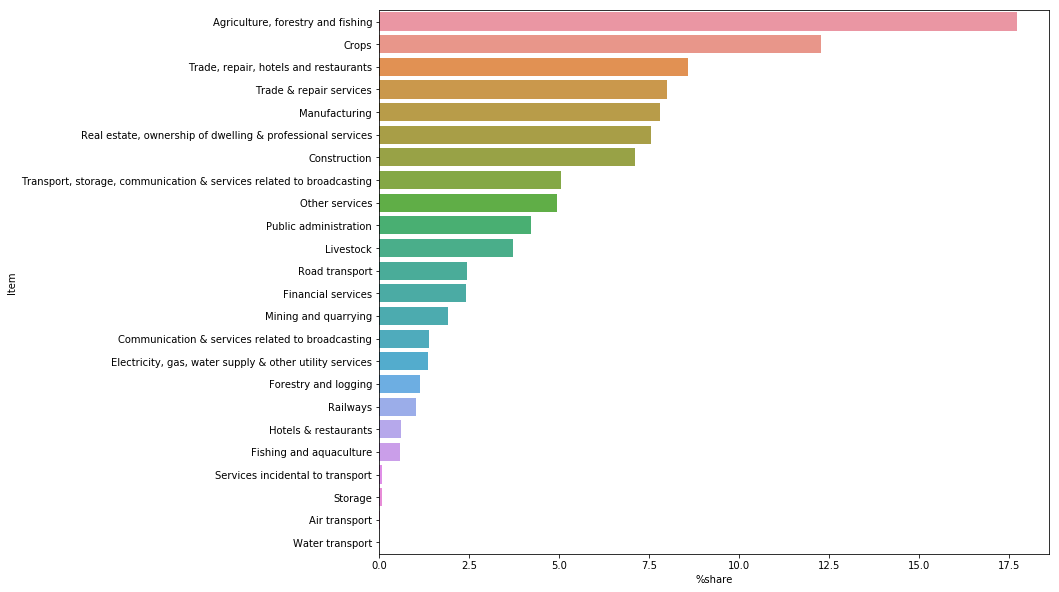

In [536]:
plt.figure(figsize=(12,10))
sns.barplot(x="%share",y = c4_states.index,data = c4_states)
plt.show()

### Part 2 Analyze the drop out ratio for each category of states

In [549]:
drop_out_data = pd.read_csv("drop_out_ratio.csv")
drop_out_data.set_index("Level of Education - State",inplace=True)
drop_out_data.head()

,Sl. No.,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
Level of Education - State,,,,,,,,,,,,,
A & N Islands,1,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
Andhra Pradesh,2,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
Arunachal Pradesh,3,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
Assam,4,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
Bihar,5,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [550]:
#states_gdp['Per Capita GSDP (Rs.)']

In [551]:
drop_out_data = pd.concat([drop_out_data,states_gdp['Per Capita GSDP (Rs.)']],axis=1,join='inner')
drop_out_data.head()

,Sl. No.,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015,Per Capita GSDP (Rs.)
Assam,4,6.24,7.44,15.36,7.2,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN,60621
Bihar,5,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN,33954
Chandigarh,6,NaN,NaN,NaN,0.1,1.08,0.44,NaN,NaN,NaN,13.65,11.28,10.55,250398
Goa,11,NaN,0.20,0.73,NaN,NaN,0.07,7.96,9.58,11.15,11.26,13.36,13.91,271793
Gujarat,12,0.74,0.76,0.89,5.2,5.55,6.41,13.55,21.61,25.04,0.46,7.83,7.04,141263


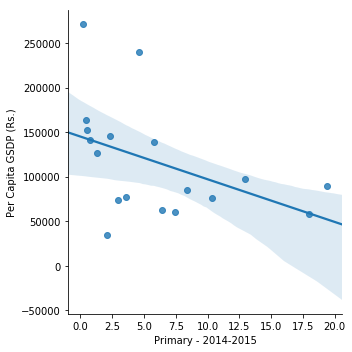

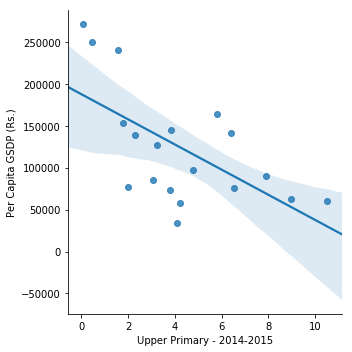

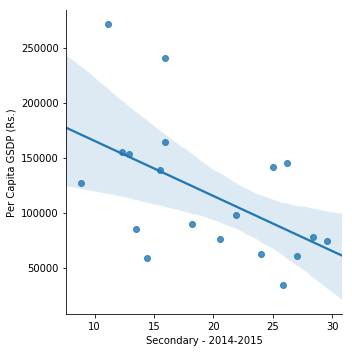

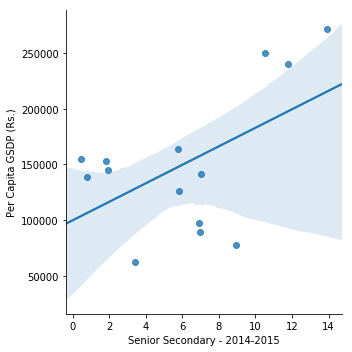

In [552]:
#Show correlation between Per Capita GDP and dropout rates
sns.lmplot(y='Per Capita GSDP (Rs.)', x='Primary - 2014-2015', data=drop_out_data )
plt.show()

sns.lmplot(y='Per Capita GSDP (Rs.)', x='Upper Primary - 2014-2015', data=drop_out_data )
plt.show()

sns.lmplot(y='Per Capita GSDP (Rs.)', x='Secondary - 2014-2015', data=drop_out_data )
plt.show()

sns.lmplot(y='Per Capita GSDP (Rs.)', x='Senior Secondary - 2014-2015', data=drop_out_data )
plt.show()